In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn import tree
import graphviz


In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
df["poutcome"]

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
11132    3
11133    0
11134    3
11135    3
11136    3
11137    3
11138    3
11139    3
11140    3
11141    3
11142    3
11143    3
11144    3
11145    0
11146    3
11147    3
11148    3
11149    3
11150    3
11151    3
11152    3
11153    3
11154    3
11155    0
11156    3
11157    3
11158    3
11159    3
11160    0
11161    3
Name: poutcome, Length: 11162, dtype: int64

In [6]:
df.select_dtypes("int64").head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [7]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031603,-0.442782,-0.126018,-0.011425,0.112300,-0.168700,-0.031418,0.027762,-0.000762,-0.026130,0.000189,-0.005278,0.002774,0.020169,-0.002699,0.034901
job,-0.031603,1.000000,0.078314,0.147046,-0.007066,0.028736,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.002432,0.003104,-0.003385,0.012665,-0.004238,0.063395
marital,-0.442782,0.078314,1.000000,0.125845,-0.014691,-0.002138,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.006781,-0.030794,0.031200,0.031281,-0.039424,0.067610
education,-0.126018,0.147046,0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.019122,-0.005327,0.025165,0.022427,-0.040262,0.095948
default,-0.011425,-0.007066,-0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,0.000950,-0.009760,0.030975,-0.036282,-0.035273,0.042357,-0.040680
balance,0.112300,0.028736,-0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.007264,0.022436,-0.013894,0.017411,0.030805,-0.027151,0.081129
housing,-0.168700,-0.136965,-0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,0.219602,0.035051,0.006660,0.064497,-0.000840,-0.046370,-0.203888
loan,-0.031418,-0.067092,-0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,0.025329,-0.001914,0.034722,-0.030416,-0.022668,0.026344,-0.110580
contact,0.027762,-0.087915,-0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,0.289803,-0.018000,0.059258,-0.227785,-0.169919,0.257993,-0.249847
day,-0.000762,0.026589,-0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.018511,0.137007,-0.077232,-0.058981,0.080221,-0.056326


In [8]:
for col in df:
    print(col,':',df[col].unique())

age : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
job : [ 0  9  7  4  5  1 10  2  3 11  6  8]
marital : [1 2 0]
education : [1 2 0 3]
default : [0 1]
balance : [2343   45 1270 ... 1594 2593 -134]
housing : [1 0]
loan : [0 1]
contact : [2 0 1]
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
month : [ 8  6  5  1 10  9  2  4  3  7  0 11]
duration : [1042 1467 1389 ... 1504  818 1812]
campaign : [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
pdays : [ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


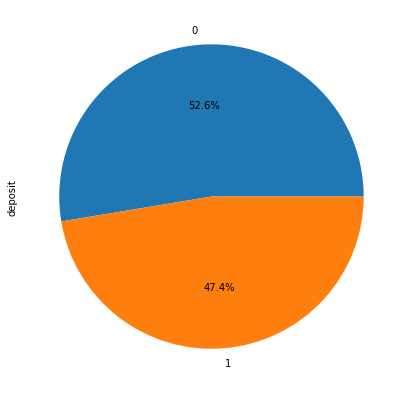

In [10]:
plt.figure(figsize=(7,7))
df["deposit"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### NAIVE AGGREGATION

In [11]:
x = df.drop("deposit",axis=1)
y = df["deposit"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
lr = LogisticRegression()
clf = tree.DecisionTreeClassifier()
clf2= tree.DecisionTreeClassifier(criterion="entropy")
model_list=[('lr',lr),('clf',clf),('clf2',clf2)]

In [13]:
from sklearn.ensemble import VotingClassifier

In [14]:
vc=VotingClassifier(estimators=model_list)

In [15]:
vc.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('clf',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None...
                             ('clf2',
  

In [16]:
y_pred=vc.predict(x_test)

In [17]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [19]:
vc1=VotingClassifier(estimators=model_list,voting="soft")

In [20]:
vc1.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('clf',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None...
                             ('clf2',
  

In [21]:
y_pred=vc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



### BOOTSTRAP AGGREGATION

# bagging

In [23]:
from sklearn.ensemble import BaggingClassifier

In [24]:
bg=BaggingClassifier(LogisticRegression(),n_estimators=10,random_state=1,max_samples=100)

In [25]:
bg.fit(x_train,y_train)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, ver

In [26]:
y_pred=bg.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1760
           1       0.80      0.74      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.78      0.78      3349
weighted avg       0.79      0.79      0.78      3349



In [28]:
# as we can see here that the bagging classifier reduces the precison,accuracy and recall so yet the naive classifier is working good

In [29]:
bg1=BaggingClassifier(LogisticRegression(),n_estimators=10,random_state=1,max_samples=100,bootstrap=False)

In [30]:
bg1.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, ve

In [31]:
y_pred=bg1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1760
           1       0.80      0.74      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [33]:
#random forest
#bg=BaggingClassifier(LogisticRegression(),n_estimators=10,random_state=1,max_samples=100)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [37]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1760
           1       0.82      0.83      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [39]:
#less precision increases means the false positives are higher
#recall increases means false negative is higher

### STACKING

In [41]:
from mlxtend.classifier import StackingClassifier

In [49]:
lr = LogisticRegression()
clf = tree.DecisionTreeClassifier()
clf2= tree.DecisionTreeClassifier(criterion="entropy")
model_list=[lr,clf,clf2]

In [50]:
meta_lr=LogisticRegression()

In [51]:
stack=StackingClassifier(classifiers=model_list,meta_classifier=meta_lr)

In [52]:
stack.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                    

In [54]:
y_pred=stack.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1760
           1       0.75      0.88      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.82      0.81      0.81      3349

